In [1]:
from astropy.io import fits as pyfits
from astropy.table import Table
import numpy as np

In [2]:
data_list = pyfits.open('C:/Users/dougl/Desktop/Marchetti data/data.fits', memmap = True)
print(data_list[1].columns)

ColDefs(
    name = 'source_id'; format = 'K'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'parallax'; format = 'D'; unit = 'mas'
    name = 'e_parallax'; format = 'D'; unit = 'mas'
    name = 'pmra'; format = 'D'; unit = 'mas yr-1'
    name = 'e_pmra'; format = 'D'; unit = 'mas yr-1'
    name = 'pmdec'; format = 'D'; unit = 'mas yr-1'
    name = 'e_pmdec'; format = 'D'; unit = 'mas yr-1'
    name = 'vrad'; format = 'D'; unit = 'km s-1'
    name = 'e_vrad'; format = 'D'; unit = 'km s-1'
    name = 'GMag'; format = 'D'
    name = 'dist'; format = 'D'; unit = 'pc'
    name = 'el_dist'; format = 'D'; unit = 'pc'
    name = 'eu_dist'; format = 'D'; unit = 'pc'
    name = 'rGC'; format = 'D'; unit = 'pc'
    name = 'el_rGC'; format = 'D'; unit = 'pc'
    name = 'eu_rGC'; format = 'D'; unit = 'pc'
    name = 'RGC'; format = 'D'; unit = 'pc'
    name = 'el_RGC'; format = 'D'; unit = 'pc'
    name = 'eu_RGC'; format = 'D'; unit = 'pc'
    

In [3]:
data_table = Table.read('C:/Users/dougl/Desktop/Marchetti data/data.fits', format = 'fits')
print(data_table)

     source_id              ra         ...       eu_vtot          P_ub  
                           deg         ...        km / s                
------------------- ------------------ ... ------------------- ---------
      2851858288640  45.13214374784831 ...  0.5053219512575993       0.0
      3332894779520  45.05816745630085 ...  1.1452636285489177       0.0
      7632157690368  45.03433652674343 ...  0.2826076895333358       0.0
      9281425163264  45.16500808636506 ...  0.7631687859223462       0.0
     12545600306304 45.234476412246075 ...  0.5946487375764491       0.0
     13301514552192  45.08615519019486 ... 0.16332905283312016       0.0
     13473313244288  45.06654206842413 ...  0.5596210790046712       0.0
     15530601898496  45.20459588312845 ...  1.7219943986792998       0.0
     15637976759168  45.19462195720764 ...  0.5819158181860757       0.0
     15741055975040   45.1360380706232 ... 0.24802411778580336       0.0
                ...                ... ...         

In [4]:
from astropy.table import QTable
from astropy import units as u
from astropy.io import ascii
table = np.ndarray(shape=(3591631,3))
ra = data_table["ra"]
dec = data_table["dec"]
for i in range(3591631, 7183261):
    table[i-3591631,0] = i
    table[i-3591631,1] = ra[i]
    table[i-3591631,2] = dec[i]
print(table)
np.savetxt("Table7.csv", table, delimiter=",")

[[ 3.59163100e+06  2.76279541e+02  1.48901352e+01]
 [ 3.59163200e+06  2.76305752e+02  1.49155306e+01]
 [ 3.59163300e+06  2.76398316e+02  1.49036039e+01]
 ...
 [ 7.18325900e+06  3.15418749e+02 -4.76531149e-01]
 [ 7.18326000e+06  3.14467555e+02 -6.97809247e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [5]:
U = data_table["U"]
V = data_table["V"]
W = data_table["W"]
X = data_table["xGC"]
Y = data_table["yGC"]
Z = data_table["zGC"]
import matplotlib.pyplot as plt
plt.xlabel("$U$", fontsize=20)
plt.ylabel("$V$", fontsize=20)
plt.axis('equal')
plt.hist2d(U, V, (1000, 1000),range=[[-200,200],[100,400]], cmap='jet',
           vmin=0,vmax=100)
plt.colorbar()
plt.show()

In [6]:
print(X[0])
print(Y[0])
print(U[0])
print(V[0])

-8452.347421581691
13.403150258349427
-29.801108944585184
271.0914685479444


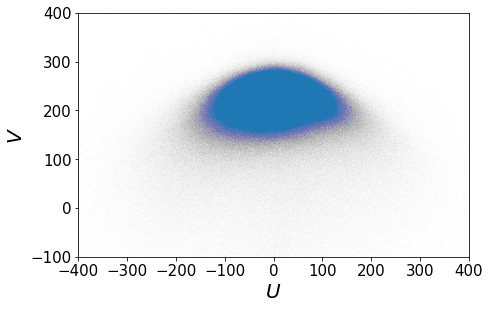

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(U, V, s=0.001, alpha=0.025)
plt.xlim(-400,400)
plt.ylim(-100,400)
#plt.axis('equal')
plt.xlabel("$U$", fontsize=20)
plt.ylabel("$V$", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gca().set_aspect("equal",adjustable="box")

C:\Users\dougl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


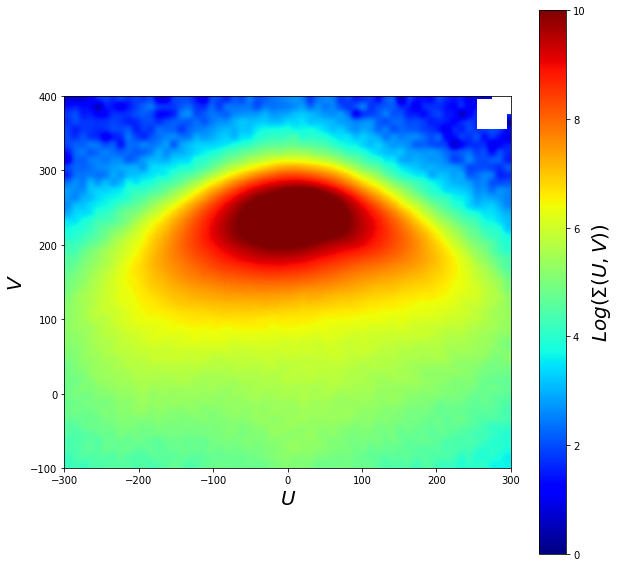

In [8]:
H = np.histogram2d(U,V,bins=(np.arange(-300,300,step=10),np.arange(-100,400,step=10)))
plt.figure(figsize=(10,10))
E = plt.imshow(np.log(H[0]).T,extent=[-300,300,-100,400],origin='lower',cmap='jet',interpolation='gaussian',
          vmin=0,vmax=10, aspect='equal')
plt.xlabel("$U$", fontsize=20)
plt.ylabel("$V$", fontsize=20)
C = plt.colorbar(E)
C.set_label('$Log(\Sigma(U,V))$',size=20)

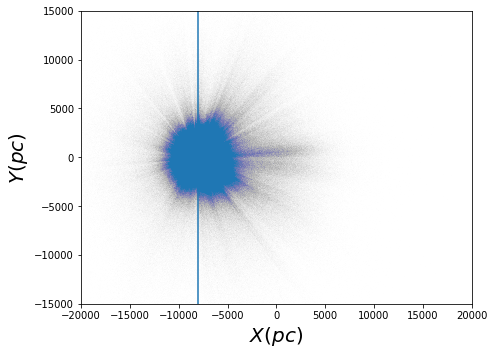

In [9]:
# Now for other plots. X-Y #
plt.figure(figsize=(7,7))
plt.scatter(X, Y, s=0.001, alpha=0.024)
plt.axvline(-8000)
plt.xlabel("$X (pc)$", fontsize=20)
plt.ylabel("$Y (pc)$", fontsize=20)
plt.xlim(-20000,20000)
plt.ylim(-15000,15000)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_aspect("equal",adjustable="box")

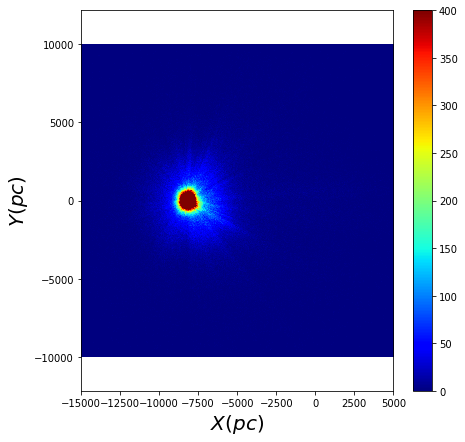

In [10]:
plt.figure(figsize=(7,7))
plt.xlabel("$X(pc)$", fontsize=20)
plt.ylabel("$Y(pc)$", fontsize=20)
plt.axis('equal')
plt.hist2d(X, Y, (1000, 1000),range=[[-15000,5000],[-10000,10000]], cmap='jet',
           vmin=0,vmax=400)
plt.colorbar()
plt.show()

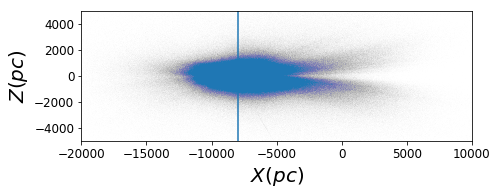

In [11]:
#X-Z
plt.figure(figsize=(7,7))
plt.scatter(X, Z, s=0.001, alpha=0.024)
plt.axvline(-8000)
plt.xlabel("$X (pc)$", fontsize=20)
plt.ylabel("$Z (pc)$", fontsize=20)
plt.ylim(-5000,5000)
plt.xlim(-20000,10000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_aspect("equal",adjustable="box")

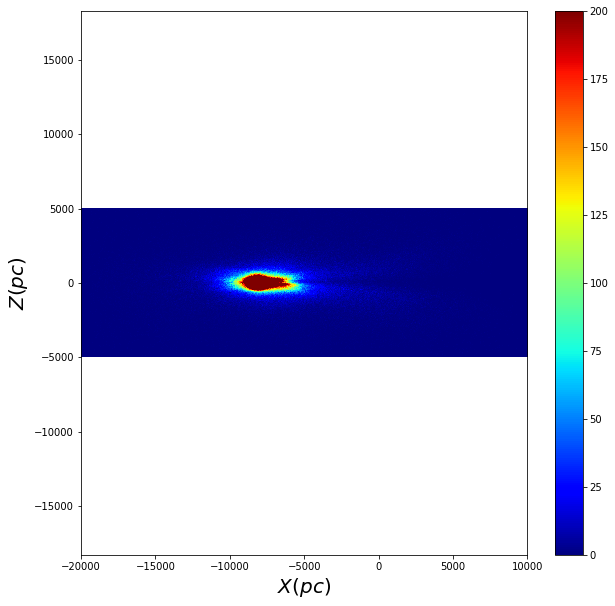

In [12]:
plt.figure(figsize=(10,10))
plt.xlabel("$X(pc)$", fontsize=20)
plt.ylabel("$Z(pc)$", fontsize=20)
plt.axis('equal')
plt.hist2d(X, Z, (1000, 1000),range=[[-20000,10000],[-5000,5000]], cmap='jet',
           vmin=0,vmax=200)
plt.colorbar()
plt.show()

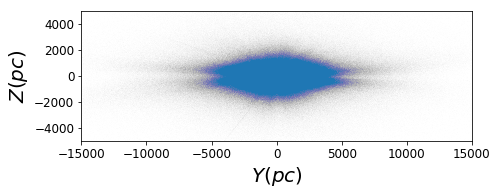

In [13]:
#Y-Z
plt.figure(figsize=(7,7))
plt.scatter(Y, Z, s=0.001, alpha=0.024)
plt.xlabel("$Y (pc)$", fontsize=20)
plt.ylabel("$Z (pc)$", fontsize=20)
plt.ylim(-5000,5000)
plt.xlim(-15000,15000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_aspect("equal",adjustable="box")

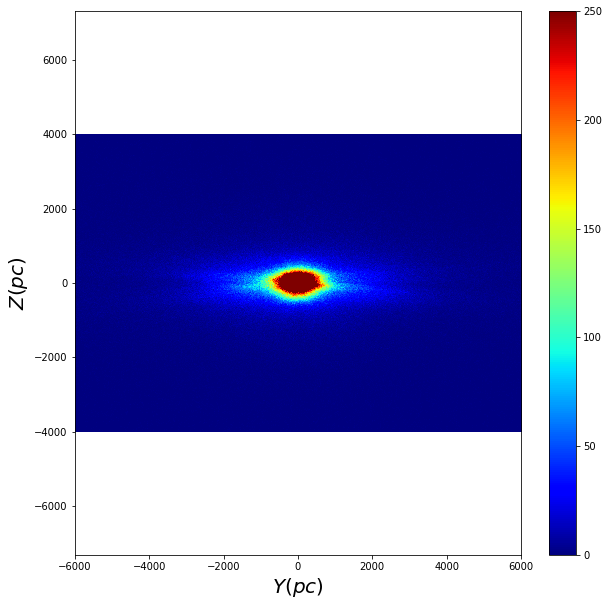

In [14]:
plt.figure(figsize=(10,10))
plt.xlabel("$Y(pc)$", fontsize=20)
plt.ylabel("$Z(pc)$", fontsize=20)
plt.axis('equal')
plt.hist2d(Y, Z, (1000, 1000),range=[[-6000,6000],[-4000,4000]], cmap='jet',
           vmin=0,vmax=250)
plt.colorbar()
plt.show()

(array([-300., -200., -100.,    0.,  100.,  200.,  300.]),
 <a list of 7 Text yticklabel objects>)

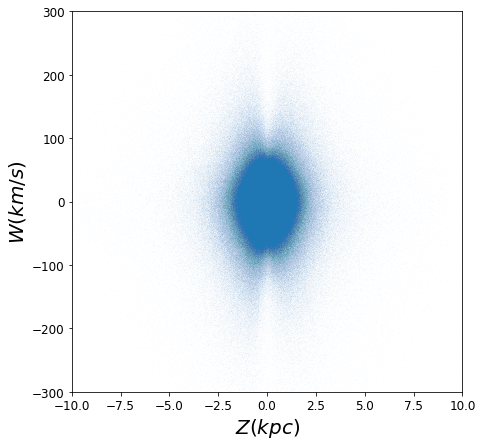

In [15]:
#Z-W
plt.figure(figsize=(7,7))
plt.scatter(Z*10**-3, W, s=0.05, alpha=0.024)
plt.xlabel("$Z (kpc)$", fontsize=20)
plt.ylabel("$W (km/s)$", fontsize=20)
plt.xlim(-10,10)
plt.ylim(-300,300)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

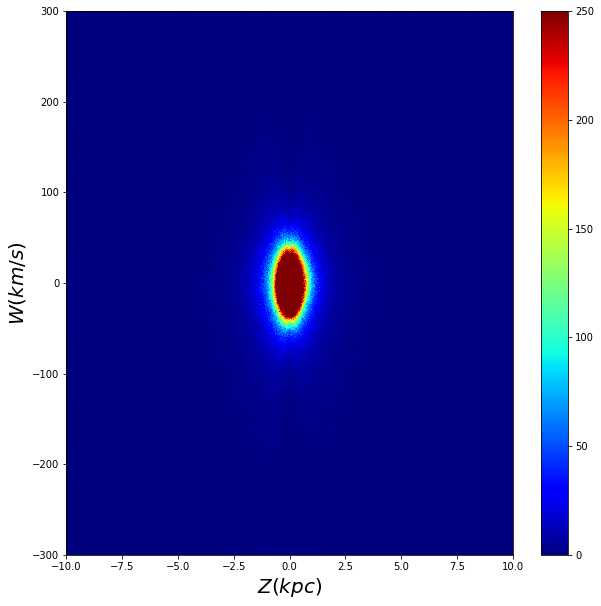

In [16]:
plt.figure(figsize=(10,10))
plt.xlabel("$Z(kpc)$", fontsize=20)
plt.ylabel("$W(km/s)$", fontsize=20)
plt.hist2d(Z*10**-3, W, (1000, 1000),range=[[-10,10],[-300,300]], cmap='jet',
           vmin=0,vmax=250)
plt.colorbar()
plt.show()

In [17]:
R = data_table["RGC"]
Phi = np.arctan2(Y,X)

V_rad = (U*X + V*Y)/(R)
V_phi = (X*V - Y*U)/(R)

print(V_rad)

         U         
       km / s      
-------------------
 30.230949111409306
-17.394199696331523
  9.615288631992847
-58.919007803425146
 -71.70452622836547
-1.3182269837673894
-19.380419686906748
  7.463424385218666
-29.388835862210048
-16.860593870910552
                ...
 -775.7410142158216
  67.88985328964228
-128.61516930049044
 31.587166871414464
-14.687073972675469
-251.20091110835344
 3.8837029437244417
 145.98529430702192
 -147.4404054898072
  35.39804176341958
Length = 7183262 rows


(-3000, 3000)

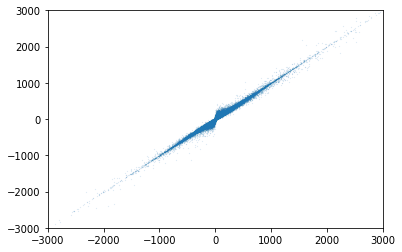

In [18]:
plt.scatter(V_rad, data_table["vR"], s=0.01, alpha=0.5)
plt.xlim(-3000,3000)
plt.ylim(-3000,3000)

In [19]:
#Selecting Volume around Sun of 100pc

VClose_X = []
VClose_Y = []
VClose_Z = []
VClose_U = []
VClose_V = []
VClose_W = []
VClose_Phi = []
VClose_Vrad = []
VClose_Vphi = []

for i in range(0,7183262):
    X_loop = X[i] + 8000
    Y_loop = Y[i]
    Z_loop = Z[i] - 25
    U_loop = U[i]
    V_loop = V[i]
    W_loop = W[i]
    Phi_loop = Phi[i]
    Vrad_loop = V_rad[i]
    Vphi_loop = V_phi[i]
    
    r_squared = X_loop**2 + Y_loop**2
    
    if r_squared <= 10000:
        VClose_X.append(X_loop*0.001 - 8)
        VClose_Y.append(Y_loop*0.001)
        VClose_Z.append((Z_loop + 25)*0.001)
        VClose_U.append(U_loop)
        VClose_V.append(V_loop)
        VClose_W.append(W_loop)
        VClose_Phi.append(Phi_loop)
        VClose_Vrad.append(Vrad_loop)
        VClose_Vphi.append(Vphi_loop)


In [37]:
print(len(VClose_X))

120148


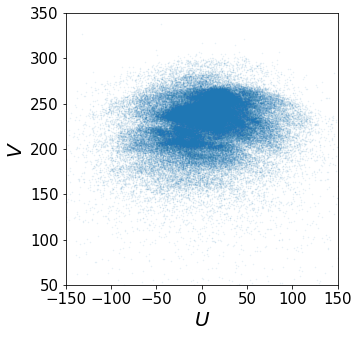

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(VClose_U, VClose_V, s=0.25, alpha=0.1)
plt.xlim(-150,150)
plt.ylim(50,350)
plt.xlabel("$U$", fontsize=20)
plt.ylabel("$V$", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gca().set_aspect("equal",adjustable="box")

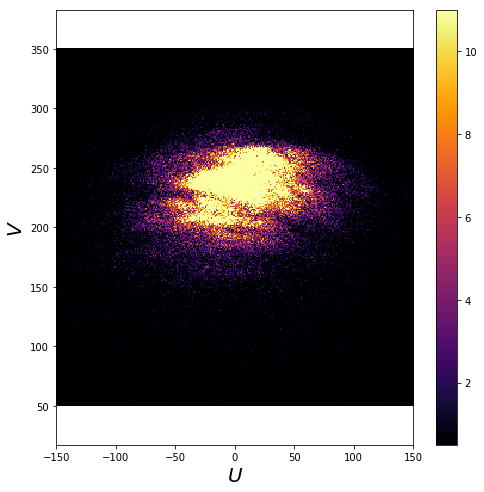

In [21]:
plt.figure(figsize=(8,8))
plt.xlabel("$U$", fontsize=20)
plt.ylabel("$V$", fontsize=20)
plt.axis('equal')
plt.hist2d(VClose_U, VClose_V, (300, 300),range=[[-150,150],[50,350]], cmap='inferno',
           vmin=0.5,vmax=11)
plt.colorbar()
plt.show()

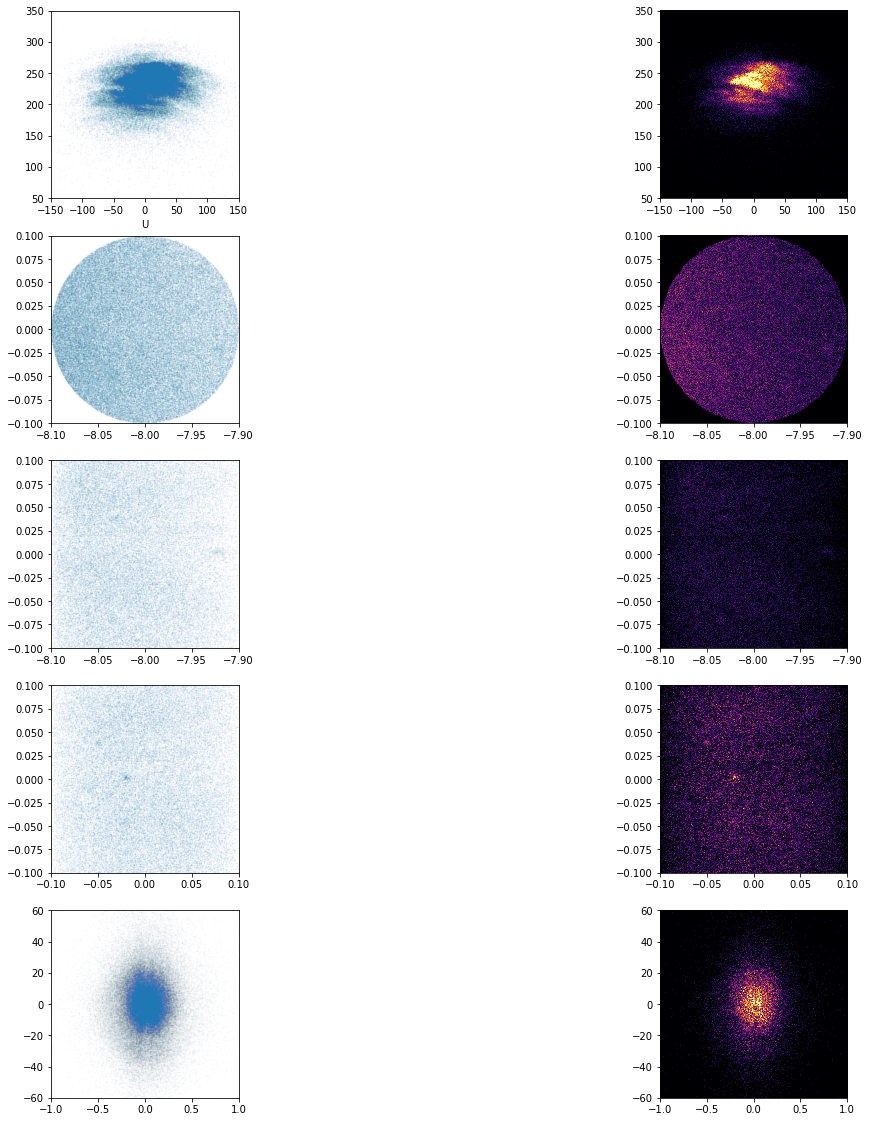

In [22]:
fig, axs = plt.subplots(5,2, figsize=(20,20))

axs[0, 0].scatter(VClose_U, VClose_V, s=0.2, alpha=0.05)
axs[0, 0].axis([-150, 150, 50, 350])
axs[0, 0].set_aspect('equal', 'box')
axs[0, 0].set_xlabel("U")

axs[0, 1].hist2d(VClose_U, VClose_V, (300, 300),range=[[-150,150],[50,350]], cmap='inferno',vmin=0,vmax=25)
axs[0, 1].set_aspect('equal', 'box')

axs[1, 0].scatter(VClose_X, VClose_Y, s=0.25, alpha=0.05)
axs[1, 0].axis([-8.1, -7.9, -0.1, 0.1])
axs[1, 0].set_aspect('equal', 'box')

axs[1, 1].hist2d(VClose_X, VClose_Y, (200, 200),range=[[-8.1,-7.9],[-0.1,0.1]], cmap='inferno',vmin=0,vmax=20)
axs[1, 1].set_aspect('equal', 'box')

axs[2, 0].scatter(VClose_X, VClose_Z, s=0.25, alpha=0.05)
axs[2, 0].axis([-8.1, -7.9, -0.1, 0.1])
axs[2, 0].set_aspect('equal', 'box')

axs[2, 1].hist2d(VClose_X, VClose_Z, (200, 200),range=[[-8.1,-7.9],[-0.1,0.1]], cmap='inferno',vmin=0,vmax=20)
axs[2, 1].set_aspect('equal', 'box')

axs[3, 0].scatter(VClose_Y, VClose_Z, s=0.25, alpha=0.05)
axs[3, 0].axis([-0.1, 0.1, -0.1, 0.1])
axs[3, 0].set_aspect('equal', 'box')

axs[3, 1].hist2d(VClose_Y, VClose_Z, (200, 200),range=[[-0.1,0.1],[-0.1,0.1]], cmap='inferno',vmin=0,vmax=10)
axs[3, 1].set_aspect('equal', 'box')

axs[4, 0].scatter(VClose_Z , VClose_W, s=0.25, alpha=0.024)
axs[4, 0].axis([-1, 1, -60, 60])
axs[4, 0].set_aspect(aspect='0.0166667',adjustable='box')

axs[4, 1].hist2d(VClose_Z, VClose_W, (200, 1200),range=[[-1,1],[-60,60]], cmap='inferno',vmin=0,vmax=10)
axs[4, 1].set_aspect(aspect='0.0166667',adjustable='box')

C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


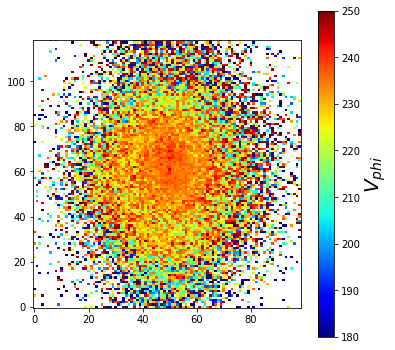

In [50]:
bin_x = np.arange(-1,1, step=0.02)
bin_y = np.arange(-60,60, step=1)
H, xed, yed = np.histogram2d(VClose_Z, VClose_W, bins=(bin_x,bin_y))

a = np.array(VClose_Z)
b = np.array(VClose_W)
c = np.array(VClose_Vphi)

mean_Vphi = np.ndarray(shape=(len(yed)-1,len(xed)-1))

for i in range(0, len(bin_x)-1):
    
    for j in range(0, len(bin_y)-1):
        
        ichoose = np.where( (a>bin_x[i]) & (a<bin_x[i+1]) & (b>bin_y[j]) & (b < bin_y[j+1]))
        
        mean_Vphi[j,i] = np.median(np.abs(c[ichoose]))

plt.figure(figsize=(6,6))
T = plt.imshow(mean_Vphi, cmap = 'jet',origin='lower', vmin=180,vmax=250)
cbar = plt.colorbar(T)
plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
cbar.set_label('$V_{phi}$',size=20)

In [24]:
#distance and parallax

parallax_arcsec = data_table["parallax"] * 10**-3
print(parallax_arcsec)

       parallax       
         mas          
----------------------
  0.002618833448523329
 0.0017422911276248122
  0.005692795564688579
 0.0037508824668195328
  0.004257021822961277
  0.003165603545690776
  0.002487375858263676
  0.004516497684243365
 0.0013114149154055512
 0.0013016987180752067
                   ...
 -0.015720280767239053
-0.0007426363628416952
 9.218774889419648e-05
 6.324372820835977e-05
 0.0001942096592979303
 0.0018916572519362168
  0.000803628893221922
0.00018228014175774467
0.00010950049746804247
 0.0001667552268375436
Length = 7183262 rows


In [25]:
d = 1/parallax_arcsec
print(d)

      parallax     
        mas        
-------------------
  381.8494072480501
  573.9568916724356
  175.6606202764115
 266.60392823450024
  234.9060074360573
 315.89552689289366
  402.0301140568497
 221.41049767138915
  762.5351734624377
  768.2269223393552
                ...
 -63.61209540760827
-1346.5540472237365
 10847.428340480426
 15811.844562759608
  5149.074477629018
  528.6369922333679
  1244.355458638108
  5486.061127432233
  9132.378602132363
  5996.813527015982
Length = 7183262 rows


(0, 2000)

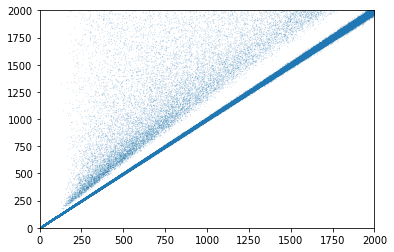

In [26]:
plt.scatter(d,data_table["dist"],s=0.01,alpha=0.5)
plt.xlim(0,2000)
plt.ylim(0,2000)

In [27]:
Abs_Gmag = data_table["GMag"] - 5*np.log10(d) + 5

In [28]:
print(Abs_Gmag)

        GMag       
-------------------
  4.454051396121379
 3.7249276252212447
   1.83321894020491
 3.5116832791494588
  5.346862382630301
 3.2892806184876644
  3.121881074392478
  5.792252959457297
 3.7363645940807633
 0.8199763857595528
                ...
 -1.787747165545051
                nan
                nan
-2.0776989490250415
-3.6063696819508007
-0.8807908681373195
   3.67936924839095
 2.1667827136841176
 -1.020426211711321
-1.8868905389533328
-0.9470677225555093
Length = 7183262 rows


In [29]:
Abs_Gmag2 = data_table["GMag"] - 5*np.log10(data_table["dist"]) + 5
print(Abs_Gmag2)

        GMag       
-------------------
  4.454848263087477
 3.7257707894493244
  1.831558823749356
 3.5132552508398565
  5.346437403168421
  3.287167299529168
  3.122932757530437
  5.783501343925721
  3.738035815410207
 0.8264872326731361
                ...
 -2.022239722820645
 -4.379955606503723
-3.4200190518740836
 -2.021220077494938
 -2.974841209963598
 -1.220307137139498
  -1.60565286686899
-1.1349776248706878
-1.1960064942404927
-1.9317618368547134
-1.1410432591758557
Length = 7183262 rows


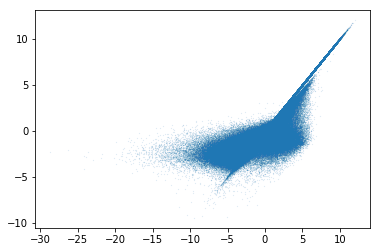

In [30]:
plt.scatter(Abs_Gmag, Abs_Gmag2, s=0.01, alpha=0.5)